In [1]:
##Business Problems:
##In this project, we are developing a streaming analytics system which aims to detect whether the person is running or walking and to prevent 
##the person from repeating the same action for multipletimes by sending health warnings.

In [2]:
##Domain Analysis:
##In this project, we are using the features of acceleartion and Angular velocity with x,y and z axes we can predict the patterns the person activity.

In [3]:
##About The Data :
##On the basis of given parameters (features) our target is to find whether a person's body gesture is to predict whether it is 
##walking or running.So We are solving classification task.

In [4]:
##Importing  Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
##Basic Checks

In [6]:
##Loading the datasets
data=pd.read_csv('walkrun.csv')

In [7]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [8]:
##Check the first five datasets
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [9]:
##Last Five of Datasets
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [10]:
##Describe of the datasets
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [11]:
##Information of the datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [12]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [13]:
data.gyro_z.value_counts()

 0.6465    9
-0.3787    9
 1.5181    8
 0.3705    8
 0.8791    8
          ..
-2.9817    1
 1.5092    1
 4.2580    1
-2.3934    1
 0.0791    1
Name: gyro_z, Length: 51296, dtype: int64

In [14]:
##Checking the null values|
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [15]:
data.gyro_z.value_counts()

 0.6465    9
-0.3787    9
 1.5181    8
 0.3705    8
 0.8791    8
          ..
-2.9817    1
 1.5092    1
 4.2580    1
-2.3934    1
 0.0791    1
Name: gyro_z, Length: 51296, dtype: int64

In [16]:
data.wrist

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: wrist, Length: 88588, dtype: int64

In [17]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [18]:
data.activity.unique()

array([0, 1], dtype=int64)

In [19]:
##Data Cleaning 

In [20]:
del data["time"]

In [21]:
del data["date"]

In [22]:
data

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [23]:
##Exploratory Data Analysis (EDA)

In [24]:
##Importing libraries for EDA 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [25]:
##Univariate Analysis
!pip install sweetviz

In [26]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='acceleration_x', ylabel='gyro_x'>

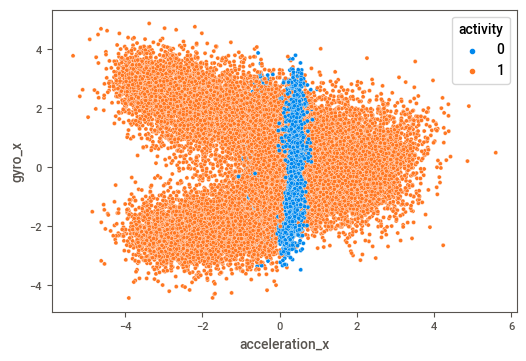

In [27]:
## Bivariate analysis
sns.scatterplot(x='acceleration_x',y='gyro_x',data=data,hue='activity')

count    88588.000000
mean        -0.074811
std          1.009299
min         -5.350500
25%         -0.381800
50%         -0.059500
75%          0.355500
max          5.603300
Name: acceleration_x, dtype: float64


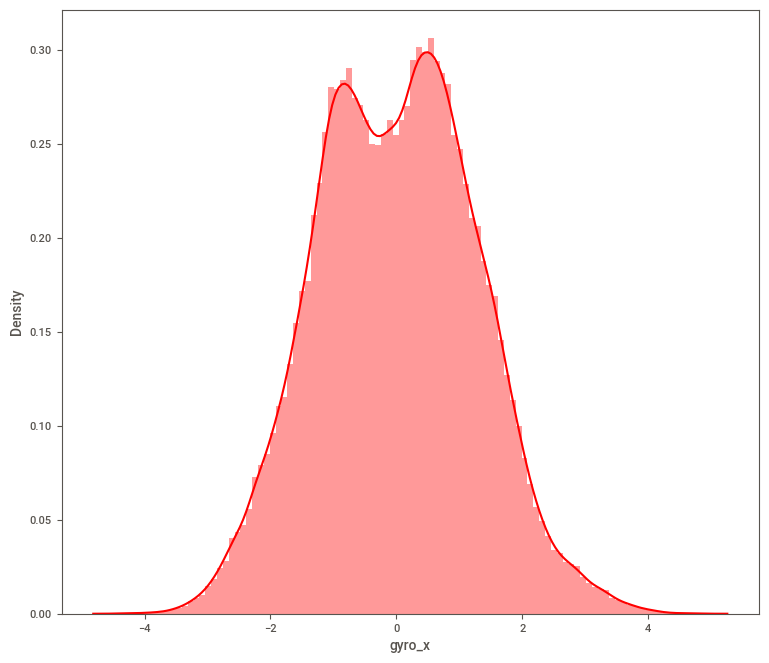

In [28]:
print(data['acceleration_x'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['gyro_x'], color='red', bins=100, hist_kws={'alpha': 0.4});

[[<AxesSubplot:title={'center':'wrist'}>
  <AxesSubplot:title={'center':'activity'}>
  <AxesSubplot:title={'center':'acceleration_x'}>]
 [<AxesSubplot:title={'center':'acceleration_y'}>
  <AxesSubplot:title={'center':'acceleration_z'}>
  <AxesSubplot:title={'center':'gyro_x'}>]
 [<AxesSubplot:title={'center':'gyro_y'}>
  <AxesSubplot:title={'center':'gyro_z'}> <AxesSubplot:>]]


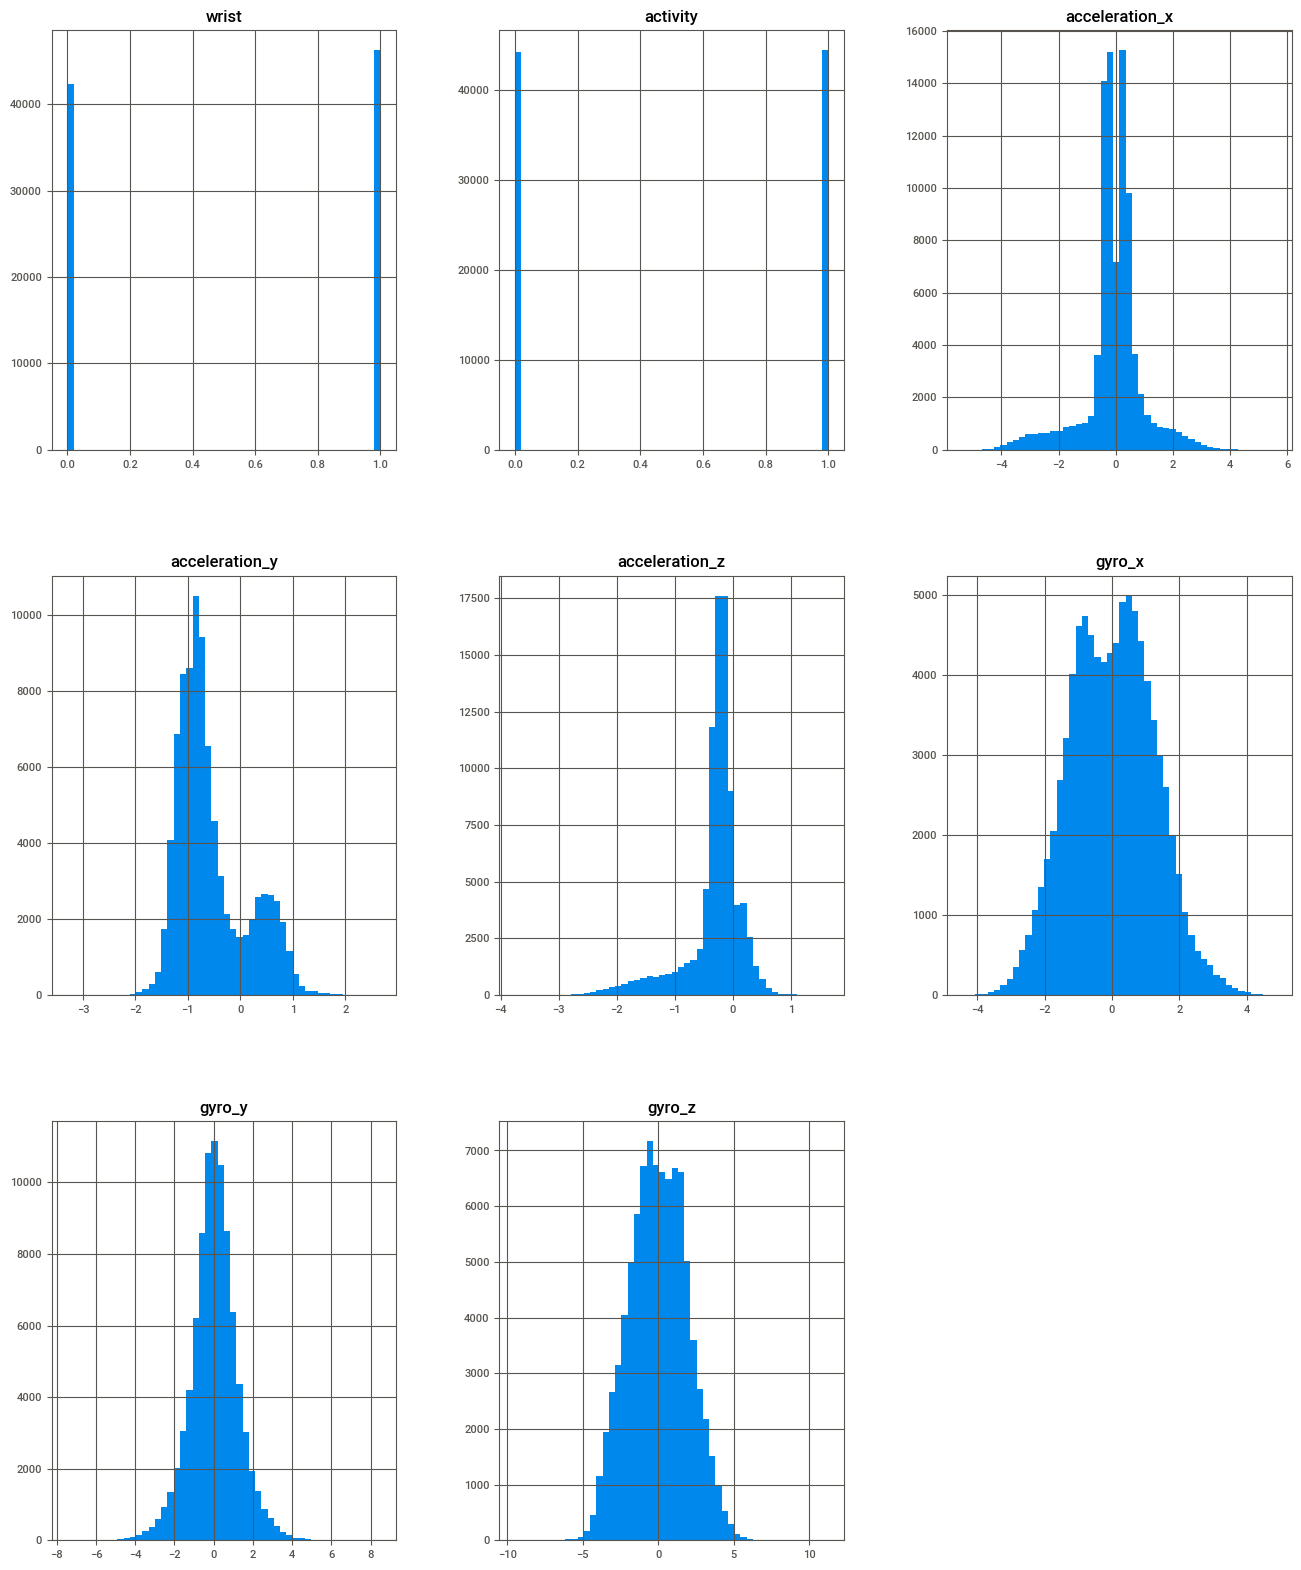

In [29]:
##To do so lets first list all the types of our data from our dataset and take only the numerical ones:
print(data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))

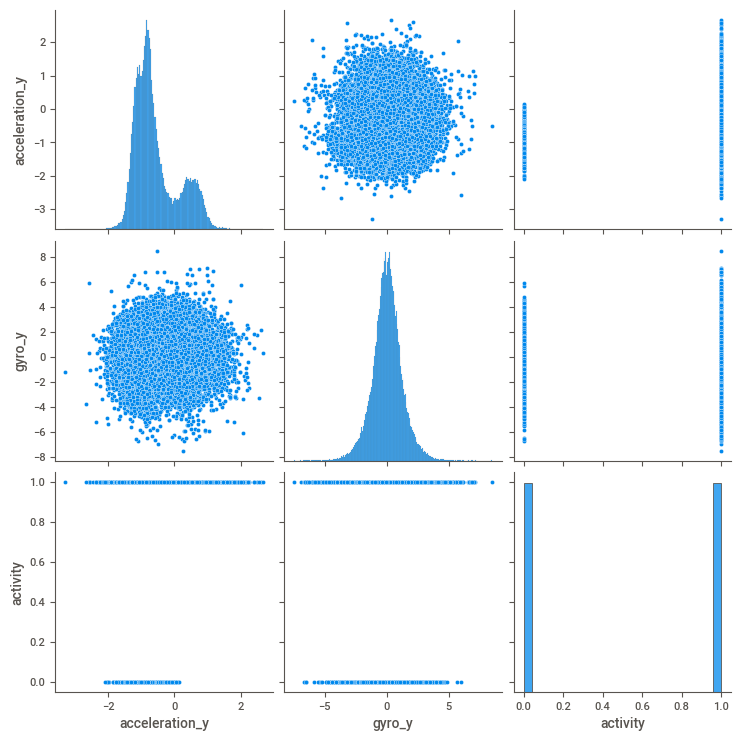

In [30]:
#plot the pair plot of in data dataframe.
sns.pairplot(data = data, vars=['acceleration_y','gyro_y','activity'])
plt.show()

In [31]:
##The EDA here gives us the insight about the relation between the running or not

In [32]:
##Defining X and y values
X=data.loc[:,['wrist', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y=data.activity

In [33]:
X

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [35]:
##Training and Testing data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [36]:
##Model Creation 
from sklearn.linear_model  import LogisticRegression
lc=LogisticRegression()
lc=lc.fit(X_train,y_train)
y_hat=lc.predict(X_test)

In [37]:
##Score Prediction
from sklearn.metrics  import accuracy_score,recall_score,precision_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_hat)
acc

0.8632771932993182

In [38]:
##Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
pg={'criterion':['gini','entropy'],'splitter':['best','random'],
    'max_depth':range(2,32,16),'min_samples_split':range(2,10,1),'min_samples_leaf':range(5,2,8)}

In [39]:
##Score Prediction
from sklearn.metrics  import accuracy_score,recall_score,precision_score,classification_report,confusion_matrix
acc=accuracy_score(y_test,y_hat)
acc 

0.8632771932993182

In [40]:
rc=recall_score(y_test,y_hat)
rc

0.8173818379751429

In [41]:
pc=precision_score(y_test,y_hat)
pc

0.8987531172069826

In [ ]:
lc.predict([[]])